# STEP 1 - IMPORT LIBRARIES

--When you use %matplotlib inline, it configures the notebook to display Matplotlib plots inline, meaning the graphs will be shown within the notebook itself rather than in separate windows or external interfaces. 
--matplotlib.rcParams["figure.figsize"]=(20,10) is a Matplotlib configuration setting that adjusts the default size of the figures (plots) created using Matplotlib library in Python

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

# STEP 2 - LOAD THE DATA

In [2]:
file_path = "C:\\Users\\anshi\\OneDrive\\Desktop\\MINI PROJECT\\archive.zip"
df1 = pd.read_csv(file_path)
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# STEP 3 -  UNDERSTAND THE DATA

In [3]:
# Get the no of rows and columns
df1.shape

(13320, 9)

In [4]:
#Get all the column names
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1.groupby("area_type")['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

# STEP 4 - Dropping the columns

In [6]:
df2 = df1.drop(['area_type', 'availability', 'society', 'balcony'],axis='columns')
print('Rows and columns are = ', df2.shape)
df2.head()

Rows and columns are =  (13320, 5)


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# STEP 5 - DATA CLEANING
-- data cleaning involves preparing the dataset for analysis by addressing issues like missing values, outliers, incorrect data types, and other inconsistencies

Checking for NA values

In [7]:
df2.isnull()

,location,size,total_sqft,bath,price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
13315,False,False,False,False,False
13316,False,False,False,False,False
13317,False,False,False,False,False
13318,False,False,False,False,False


In [8]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Dropping & Handleing NA Values

In [9]:
df3=df2.dropna()
df3.isnull().sum() #checking if dropped or not

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Size column containes the size of house in terms of BHK ( Bedroom Hall Kitchen) , Bedroom  
To simply it we can create new column by the name 'bhk' and add only numeric value of how many BHK's

In [11]:
df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0])) #tokenizing string into 2 parts with space (' ') and selecting the first part [0]

C:\Users\anshi\AppData\Local\Temp\ipykernel_2788\3221781839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0])) #tokenizing string into 2 parts with space (' ') and selecting the first part [0]


In [12]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

From above data we can see that there are home with upto 43 BHK's in Bangalore which is irrelevant

In [14]:
#Get the training examples with home size more than 20 BHK
df3[df3.bhk >20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [15]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

note above, there are few records with range of the area like '1133 - 1384'. Lets write a function to identify such values

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
#function that identify if the number is float or not by returning trur or false

In [17]:
df3[~df3['total_sqft'].apply(is_float)].head(10)
#filters the DataFrame rows based on the condition of elements in the 'total_sqft' column being floats, returning the rows where this condition holds False.

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


Since most the value are range of sqft, we can write a function to get the average value from a range.

In [18]:
def convert_range_to_num(sqft):
    if '-' in sqft:  # Assuming ranges are separated by '-'
        range_values = sqft.split('-')
        return (float(range_values[0]) + float(range_values[1])) / 2
    else:
        try:
            return float(sqft)
        except ValueError:
            
            return None  # For instance, returning None for non-convertible values


In [19]:
#Lets test the convert_range_to_sqft()
print('Return value for i/p 12345 = %s' % (convert_range_to_num('12345')))
print('Return value for i/p 1133 - 1384 = %s' % (convert_range_to_num('1133-1384')))
print('Return value for i/p 34.46Sq. Meter = %s' % (convert_range_to_num('34.46Sq. Meter')))
     

Return value for i/p 12345 = 12345.0
Return value for i/p 1133 - 1384 = 1258.5
Return value for i/p 34.46Sq. Meter = None


In [20]:
# Lets apply this function for total_sqft column
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_range_to_num)
df4.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [21]:
# Since our converion function will return null for values like 34.46Sq. Meter. Lets check for any null values in it
df4.total_sqft.isnull().sum()

46

In [22]:
# Lets drop the null training sets from total_sqft
df5 = df4.dropna()
df5.total_sqft.isnull().sum()


0

# Step 6 - Feature Engineering
--Feature engineering is the process of transforming raw data into features that are suitable for machine learning models. In other words, it is the process of selecting, extracting, and transforming the most relevant features from the available data to build more accurate and efficient machine learning models.

price column containes the price of house in lakh ( 1 lakh = 100000)
Price per square fit is important parameter in house prices.
So we can create new column by the name 'price_per_sqft' and add price per sqft in it. formula = (price * 100000)/total_sqft

In [23]:
df6 = df5.copy()
df6['price_per_sqft']= (df6['price']*100000)/df6['total_sqft']
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
df6_stats = df6['price_per_sqft'].describe()
df6_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [25]:
len(df6.location.unique())

1298

In a dataset, a categorical variable like 'location' with 1287 categories indicates that there are 1287 unique locations present in that specific column. Categorical variables represent qualitative data and don't have a mathematical meaning or numerical relationship between the categories.

Before using One Hot Encoding to create dummy variables we must reduce the number of categories by using dimensionality reduction so that we will get less number of dummy variables.
Our criteria for dimesionality reduction for 'location' is to use 'other' location for any location having less than 10 data points.
One Hot Encoding
One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.

In [26]:
#Trim the location values
df6.location = df6.location.apply(lambda x:x.strip()) #Remove any extra leading or Trailing Space from Location
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [27]:
#Lets get the count of each location
location_stats = df6.location.value_counts(ascending=False)
location_stats
     

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

As we can see that there are many location with less than 10 count for ex - rajanna Layout
We are going assign a category 'other' for every location where total datapoints are less than 10

In [28]:
#Get total number of categories where data points are less than 10
print('Total no of locations where data points are more than 10 = %s' % (len(location_stats[location_stats > 10])))
print('Total no of locations where data points are less than 10 = %s' % (len(location_stats[location_stats <= 10])))

Total no of locations where data points are more than 10 = 240
Total no of locations where data points are less than 10 = 1047


In [29]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [30]:
#Using lambda function assign the 'other' type to every element in 'location_stats_less_than_10'
df7 = df6.copy()
df7.location = df6.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x )
len(df7.location.unique())
     

241

Since 1047 location with less than 10 data points are converted to one category 'other' Total no of unique location categories are = 240 +1 = 241

In [31]:
df7.head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


# STEP 7 - Outlier Removal

An outlier is an observation that is unlike the other observations. It is rare, or distinct, or does not fit in some way.
Outliers are the data points that represent the extreme variation of dataset
Outliers can be valid data points but since our model is generalization of the data, outliers can affect the performanace of the model. We are going to remove the oUtliers, but please note its not always a good practice to remove the outliers.
To remove the outliers we can use real estate domain knwoledge and standard deviation

Standard Deviation
--Standard deviation is measure of spread that is to how how much does the data vary from the average
--A low standard deviation tells us that the data is closely clustered around the mean (or average), while a high standard         deviation indicates that the data is dispersed over a wider range of values.
--It is used when the distribution of data is approximately normal, resembling a bell curve.
--One standard deviation(1 Sigma) of the mean will cover 68% of the data. i.e. Data between (mean - std deviation) & (mean + std   deviation) is 1 Sigma and which is equal to 68%
--Here we are going to consider 1 Sigma as our threshold adn any data outside 1 Sigma will be considered as outliner
https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/


Using domain knowledge for outlier removal
Normally square fit per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft)
If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier.
We will remove such outliers by keeping our minimum threshold per bhk to be 300 sqft

In [32]:
# Lets visualize the data where square fit per bedroom is less than 300
df7[(df7.total_sqft / df7.bhk) < 300].head()
     

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


Note above we have 744 training examples where square fit per bedroom is less than 300. These are outliers, so we can remove them

In [33]:
df8 = df7[~((df7.total_sqft / df7.bhk) < 300)]
df8.shape

(12456, 7)

Outlier Removal - 
Using Standard Deviation and Mean
One standard deviation(1 Sigma) of the mean will cover 68% of the data. i.e. 
Data between (mean - std deviation) & (mean + std deviation) is 1 Sigma and which is equal to 68%
Here any datapoint outside the 1 Sigma deviation (68%) is outliner for us

In [34]:
# Get basic stats of column 'price_per_sqft'
df8.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Note: Its important to understand that price of every house is location specific. We are going to remove outliers using 'price_per_sqft' for each location

Text(0, 0.5, 'Count')

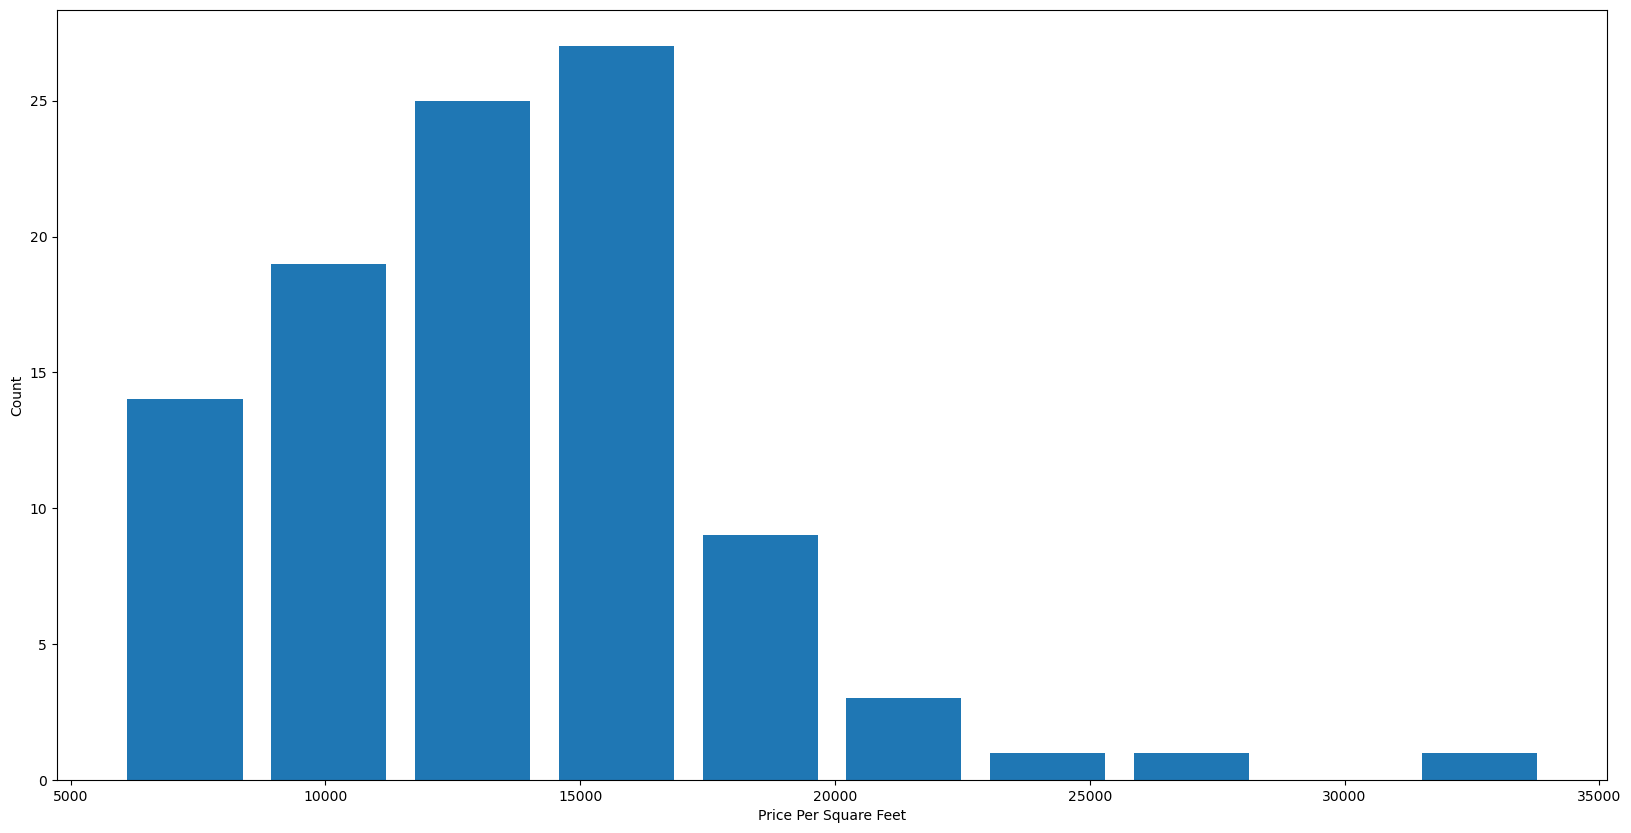

In [35]:
# Data visualization for 'price_per_sqft' for location 'Rajaji Nagar'
# Note here its normal distribuation of data so outlier removal using stad deviation and mean works perfectly here
plt.hist(df8[df8.location == "Rajaji Nagar"].price_per_sqft,rwidth=0.8)
#rwidth=0.8: This parameter specifies the relative width of the bars in the histogram. A value of 0.8 is used to leave some space between adjacent bars.
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")


In [36]:
# Function to remove outliers using pps(price per sqft)
def remove_pps_outliers(df):
    # Create an empty DataFrame to store the filtered data without outliers
    df_out = pd.DataFrame()

    # Iterate over each unique 'location' in the input DataFrame
    for key, subdf in df.groupby('location'):
        # Calculate the mean and standard deviation for the 'price_per_sqft' within each 'location'
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)

        # Filter out data points outside 1 standard deviation from the mean
        reduced_df = subdf[(subdf.price_per_sqft > (mean - std)) & (subdf.price_per_sqft <= (mean + std))]

        # Concatenate the filtered data for the current 'location' to the overall filtered DataFrame
        #ignore_index=True: This parameter is set to True to reset the index of the resulting DataFrame. 
        #Without this, the resulting DataFrame would retain the original indices from both df_out and reduced_df. 
        #Setting ignore_index to True creates a new integer index for the concatenated DataFrame.
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)

    # Return the DataFrame containing data without outliers
    return df_out

# Call the remove_pps_outliers function on the DataFrame 'df8' and store the result in 'df9'
df9 = remove_pps_outliers(df8)
print(df9.shape)


(10242, 7)


Text(0, 0.5, 'Count')

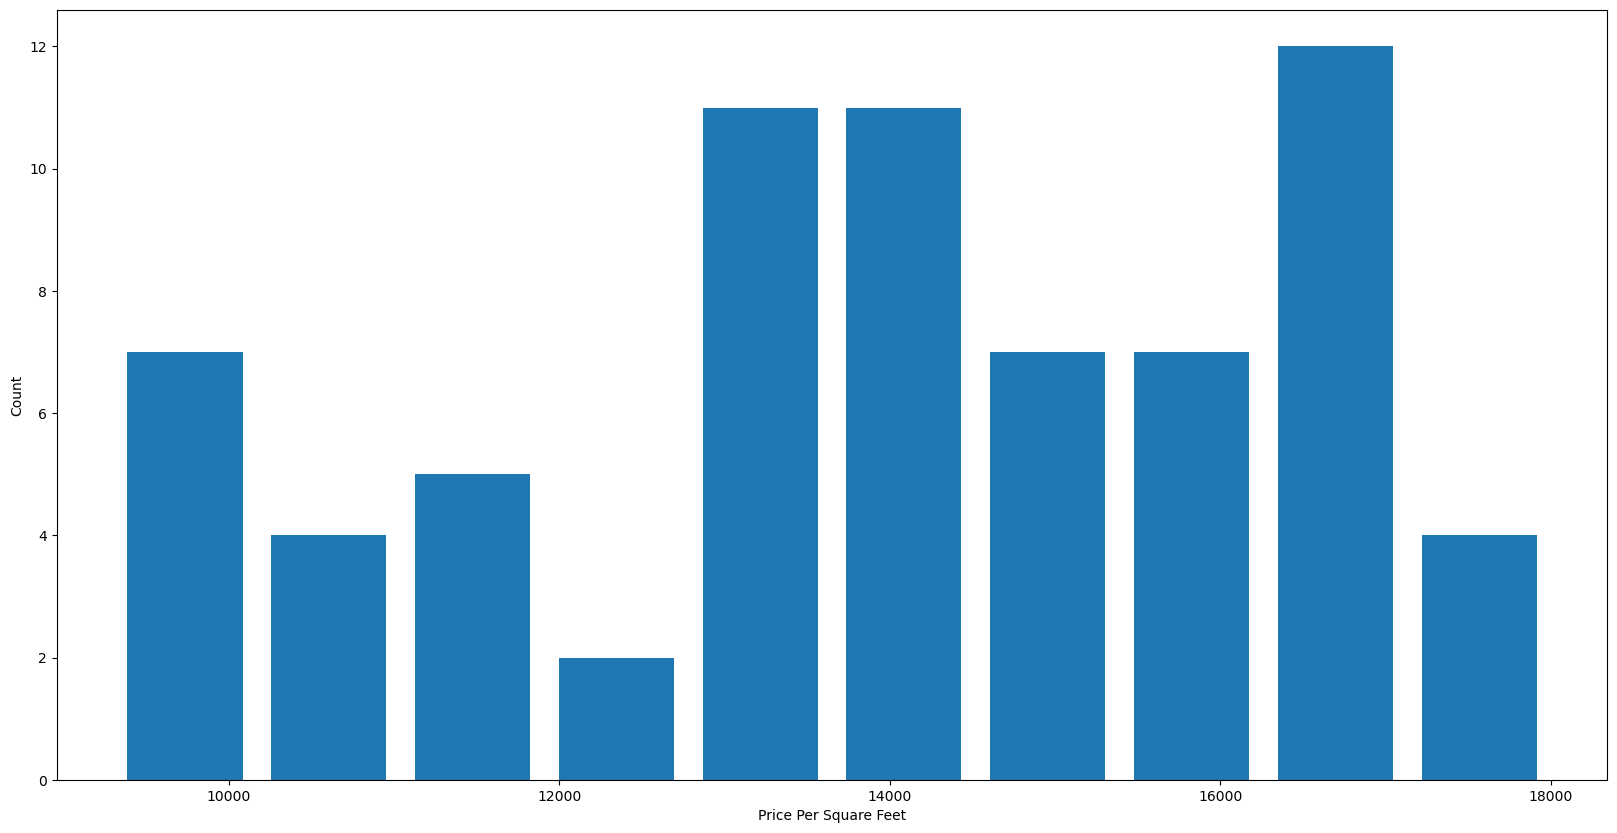

In [37]:
# Data visualization for 'price_per_sqft' for location 'Rajaji Nagar' after outlier removal
plt.hist(df9[df9.location == "Rajaji Nagar"].price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Using domain knowledge for outlier removal

If location and price per square foot area is aslo same then price of 3BHK should be more than 2 BHK


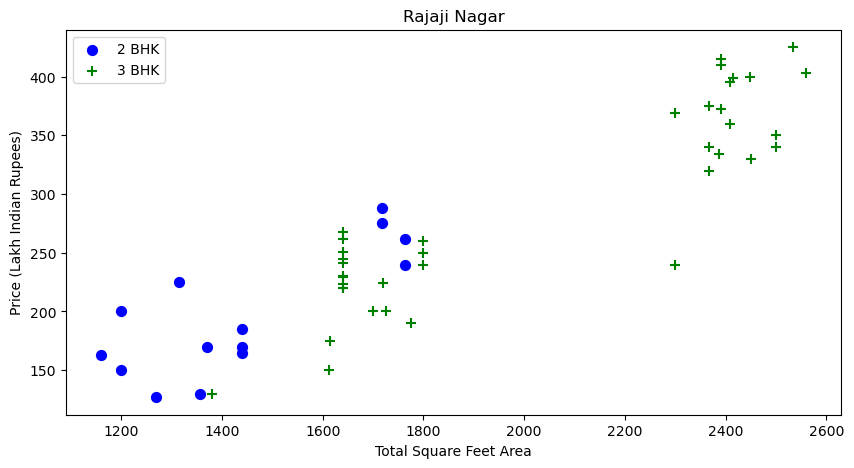

In [38]:
# Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like
def plot_scatter_chart(df, location):
    # Filter DataFrame for 2 BHK and 3 BHK properties in the given location
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    
    # Set the size of the plot
    matplotlib.rcParams['figure.figsize'] = (10, 5)
    
    # Scatter plot for 2 BHK properties
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    
    # Scatter plot for 3 BHK properties
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50) # s= size of marker
    
    # Labeling the x-axis
    plt.xlabel("Total Square Feet Area")
    
    # Labeling the y-axis
    plt.ylabel("Price (Lakh Indian Rupees)")
    
    # Setting the title of the plot to the given location
    plt.title(location)
    
    # Displaying a legend to differentiate between 2 BHK and 3 BHK properties
    plt.legend()

# Call the plot_scatter_chart function for the location "Rajaji Nagar"
plot_scatter_chart(df9, "Rajaji Nagar")


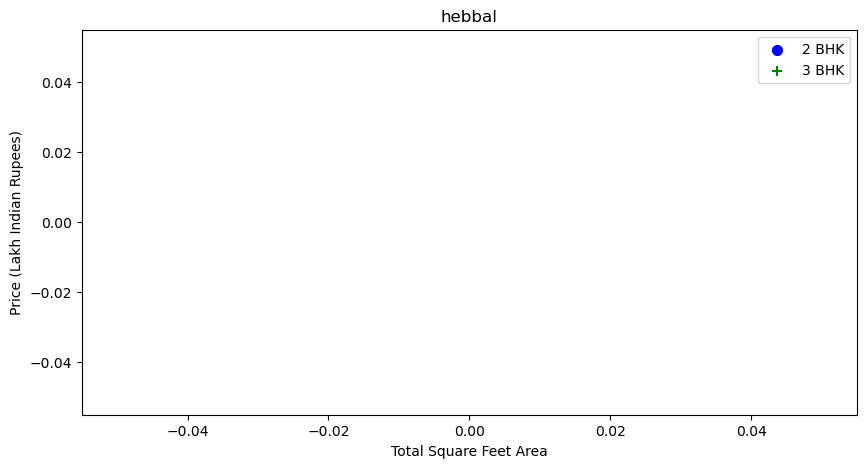

In [39]:
# Call the plot_scatter_chart function for the location "Hebbal"
plot_scatter_chart(df9, "hebbal")


In [40]:
def remove_bhk_outliers(df):
    # An array to store indices of rows to be excluded
    exclude_indices = np.array([])

    # Iterate over each location in the DataFrame
    for location, location_df in df.groupby('location'):
        # Dictionary to store statistics for each bedroom configuration in the current location
        bhk_stats = {}

        # Iterate over each unique number of bedrooms (bhk) in the current location
        for bhk, bhk_df in location_df.groupby('bhk'):
            #This line starts a loop that iterates over each unique number of bedrooms (bhk) in the current location.
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            #This line calculates and stores the mean, standard deviation, and count of properties
            #for the current bhk configuration in the bhk_stats dictionary.
#The code then repeats the same process for the second loop to compare the statistics of the current bhk with the previous bhk.

        # Iterate over each unique number of bedrooms (bhk) in the current location again
        for bhk, bhk_df in location_df.groupby('bhk'):
            # Get statistics for the previous number of bedrooms (bhk-1)
            stats = bhk_stats.get(bhk-1)

            # Check if stats exist and the count is greater than 5
            if stats and stats['count'] > 5:
                # Append the indices of rows where price_per_sqft is less than the mean of the previous bhk
                #This line appends the indices of rows where the price_per_sqft is less than the mean of the previous bhk to the exclude_indices array.
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values)

    # Drop rows with indices specified in exclude_indices
    return df.drop(exclude_indices, axis='index')

# Call the remove_bhk_outliers function on the DataFrame df10 and store the result in df11
df10 = remove_bhk_outliers(df9)

# Print the shape (number of rows and columns) of the resulting DataFrame df11
print(df10.shape)


(7317, 7)


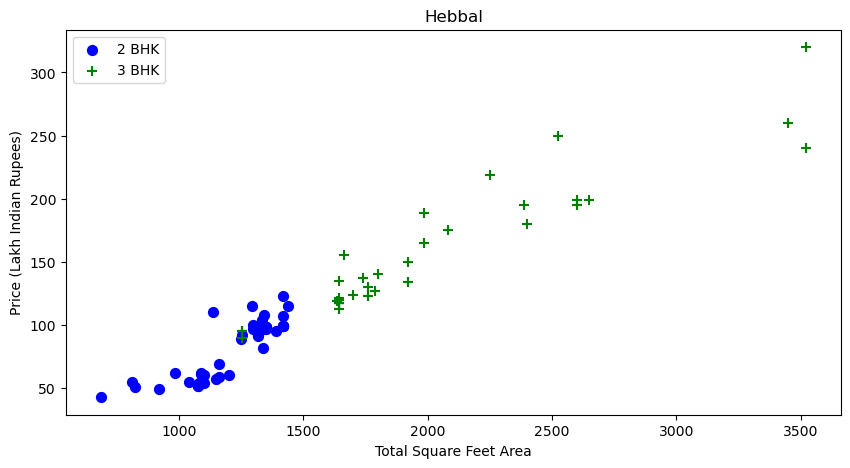

In [41]:
#Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties
plot_scatter_chart(df10,"Hebbal")
     

Text(0, 0.5, 'Count')

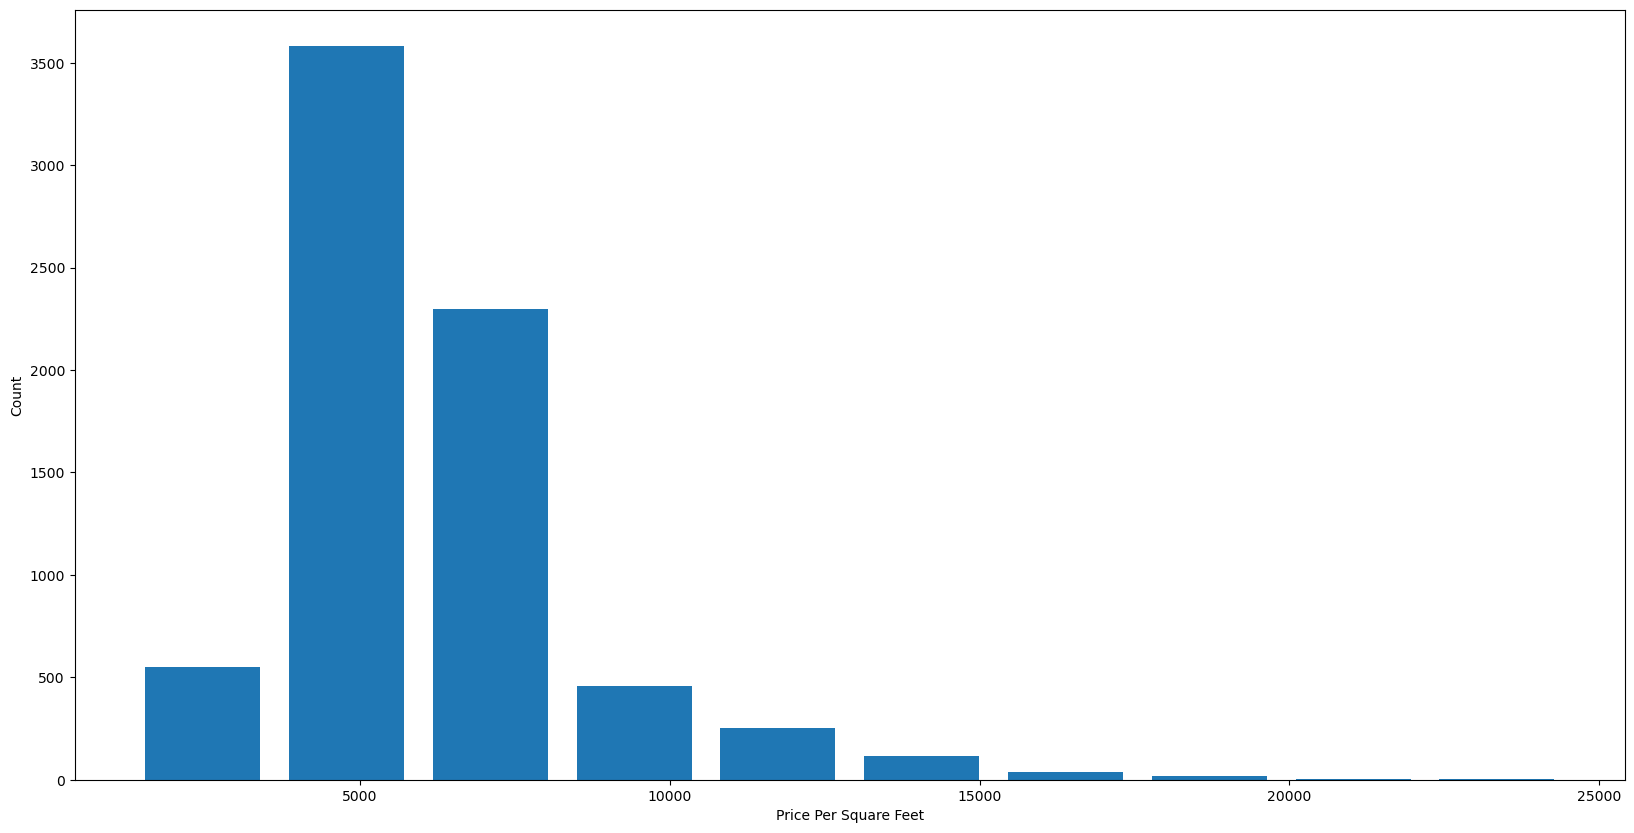

In [42]:
#Now lets plot the histogram and visualize the price_per_sqft data after outlier removal

matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df10.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [43]:
#Get the training examples where no of bath are more than (no of BHK +2)
df10[df10.bath > df10.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [44]:
#Lets check current dataset shape before removing outliers
df10.shape

(7317, 7)

In [45]:
# Remove the outliers with more than (no of BHK + 2) bathrooms
df11 = df10[df10.bath < (df10.bhk + 2)]
df11.shape

(7239, 7)

In [46]:
df12 = df11.drop(['size', 'price_per_sqft'], axis='columns')
df12.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


# STEP 8 - ONE HOT ENCODING

In [47]:

dummies = pd.get_dummies(df12.location)
dummies.head(10)


,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
#Now lets add dummies dataframe to original dataframe
df13 = pd.concat([df12,dummies],axis='columns')
df13.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
#Lets delete the location feature
df14 = df13.drop(['location'],axis='columns')
df14.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Step 9 - Build Machine Learning Model

In [50]:
#Final shape of our dataset is
df14.shape

(7239, 245)

In [51]:
X = df14.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
Y = df14.price
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

Split the dataset to training and test dataset

This function splits the features (X) and the target variable (y) into training and testing sets. The test_size parameter specifies the proportion of the dataset to include in the test split (in this case, 20%). The random_state parameter ensures reproducibility by seeding the random number generator.

In [53]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

# Print the shapes of the resulting sets
print('X_train shape = ', X_train.shape)
print('X_test shape = ', X_test.shape)
print('y_train shape = ', Y_train.shape)
print('y_test shape = ', Y_test.shape)


X_train shape =  (5791, 244)
X_test shape =  (1448, 244)
y_train shape =  (5791,)
y_test shape =  (1448,)


# Linear Regression

In [54]:
 from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(X_train, Y_train)
lr_clf.score(X_test, Y_test)

0.8557800354237939

# Use K Fold cross validation to measure accuracy of our LinearRegression model

Using Sklearn cross_val_score function
Note: Sklearn's cross_val_score uses StratifiedKFold by default

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression

# ShuffleSplit is used to randomize each fold
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#Creating a ShuffleSplit object for cross-validation. 
#It specifies to perform 5 splits, use 20% of the data for testing, and set a random seed for reproducibility.

# cross_val_score function to perform cross-validation on a Linear Regression model
cross_val_score(LinearRegression(), X, Y, cv=cv)


array([0.82702546, 0.86015354, 0.85221963, 0.84364854, 0.85483617])

# GridSearchCV

GridSearchCV is a very good API that SKlearn provide which can run your model on different regressor and parameters and it can tell you the best score.

In [56]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, Y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Assuming X and Y are your feature matrix and target variable
# find_best_model_using_gridsearchcv(X, Y)

find_best_model_using_gridsearchcv(X,Y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\

,model,best_score,best_params
0,linear_regression,0.847577,{}
1,lasso,0.738732,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.763001,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


# Step 10- Testing The model

Since all our locations are now columns in form of dummy variabales, all other dummy variables value should be 0 except the one(dummy variable column for our location) we are predicting for
This(np.where(X.columns==location)[0][0]) code will give us index of dummy column for our location
Now we will assign value '1' to this index and keep all other dummy variable columns as '0'

In [57]:
def predict_price(location, sqft, bath, bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]
     

In [58]:
predict_price('1st Phase JP Nagar',1000, 2, 3)
     

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


61.21488952636719

In [59]:
predict_price('1st Phase JP Nagar',1000, 3, 3)
     

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


65.91105651855469

65 LAKH RUPEES AS AN ESTIMATED PRICE

In [60]:
predict_price('Indira Nagar',2000, 3, 3)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


271.83837890625

In [61]:
import pickle

with open('Real_Estate_Price_Prediction_Project.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [62]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))